In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
# The id column adds no value to this classification problem. As such, we will drop it.
iris.drop('Id', axis=1, inplace=True)
iris.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# checking for null entries
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

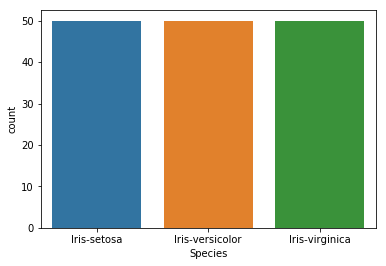

In [9]:
#Test Result
sns.countplot(data=iris, x = 'Species', label='Count')

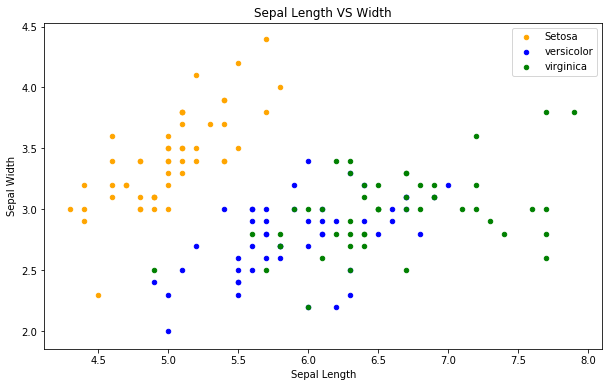

In [10]:
# Checking to see if categorization can be done using the sepal length and sepal width

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',\
                    y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',\
                    y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',\
                    y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

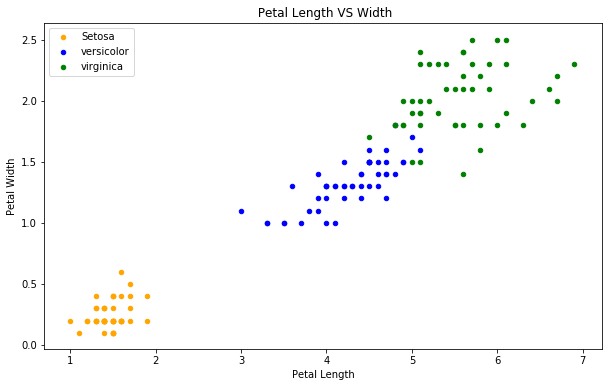

In [11]:
# checking to see if petal length and width can be used for classification
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

Text(0.5,1,'Correlation between features')

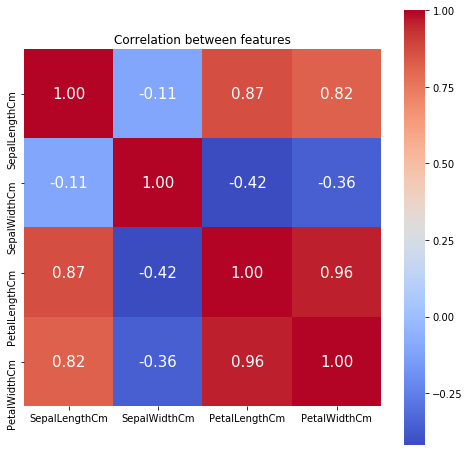

In [12]:
# Checking for collinearity
iris_corr = iris.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(iris_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features')

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split 
from sklearn import svm

C:\Users\emmanuel osademe\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
# Classification using the entire dataset
X = iris.drop('Species', axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [16]:
y = iris['Species']
y.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

In [17]:
#Splitting the dataset
X_train,X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(135, 4)
(135,)
(15, 4)
(15,)


Logistic Regression Training Score: 
 92.59
Logistic Regression Test Score: 
 93.33
Accuracy: 
 0.9333333333333333
Confusion Matrix: 
 [[6 0 0]
 [0 3 0]
 [0 1 5]]


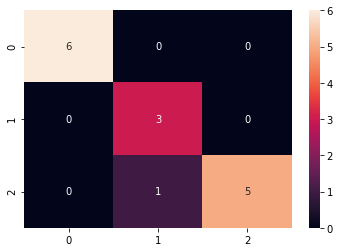

In [18]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

Gaussian Score: 
 95.56
Gaussian Test Score: 
 93.33
Accuracy: 
 0.9333333333333333
[[6 0 0]
 [0 3 0]
 [0 1 5]]


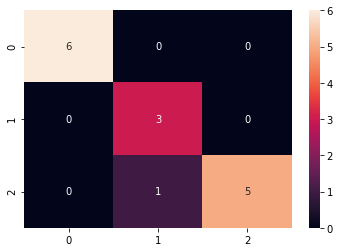

In [19]:
#3 Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

Random Forest Score: 
 100.0
Random Forest Test Score: 
 100.0
Accuracy: 
 1.0
[[6 0 0]
 [0 3 0]
 [0 0 6]]


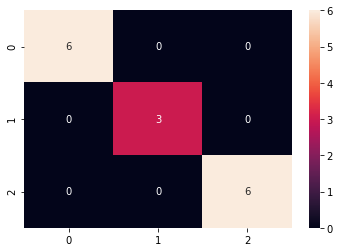

In [20]:
#4 Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)

random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))

sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

Support vector training score: 
 97.04
Support vector test score: 
 100.0
Accuracy: 
 1.0
[[6 0 0]
 [0 3 0]
 [0 0 6]]


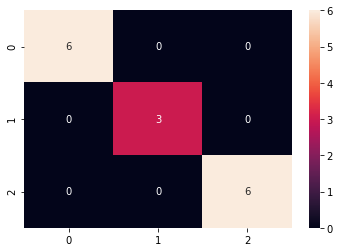

In [21]:
sv_model = svm.SVC() 
sv_model.fit(X_train,y_train) 

sv_predicted = sv_model.predict(X_test)

support_vector_score = round(sv_model.score(X_train, y_train) * 100, 2)
support_vector_score_test = round(sv_model.score(X_test, y_test) * 100, 2)
print('Support vector training score: \n', support_vector_score)
print('Support vector test score: \n', support_vector_score_test)
print('Accuracy: \n', accuracy_score(y_test,sv_predicted))
print(confusion_matrix(y_test,sv_predicted))

sns.heatmap(confusion_matrix(y_test,sv_predicted),annot=True,fmt="d")

In [22]:
new_features =['SepalLengthCm', 'SepalWidthCm', 'Species']
X2 = iris.drop(new_features, axis=1)
X2.head(2)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2


In [23]:
X2 = preprocessing.scale(X2)
y2 = iris['Species']

In [24]:
#Splitting the dataset
X2_train,X2_test, y2_train,  y2_test = train_test_split(X2,y2, test_size = 0.1)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(135, 2)
(135,)
(15, 2)
(15,)


Logistic Regression Training Score: 
 93.33
Logistic Regression Test Score: 
 100.0
Accuracy: 
 1.0
Confusion Matrix: 
 [[5 0 0]
 [0 3 0]
 [0 0 7]]


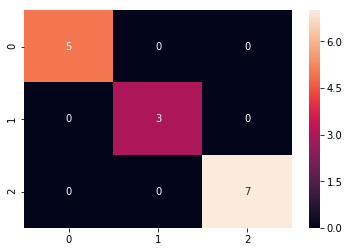

In [25]:
logreg = LogisticRegression()

logreg.fit(X2_train, y2_train)

log_predicted= logreg.predict(X2_test)

logreg_score = round(logreg.score(X2_train, y2_train) * 100, 2)
logreg_score_test = round(logreg.score(X2_test, y2_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y2_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y2_test,log_predicted))

sns.heatmap(confusion_matrix(y2_test,log_predicted),annot=True,fmt="d")

Gaussian Score: 
 95.56
Gaussian Test Score: 
 100.0
Accuracy: 
 1.0
[[5 0 0]
 [0 3 0]
 [0 0 7]]


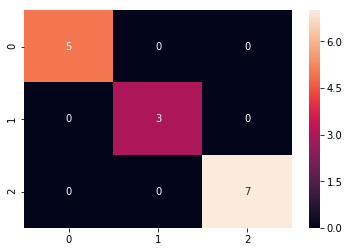

In [26]:
#3 Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X2_train, y2_train)
gauss_predicted = gaussian.predict(X2_test)

gauss_score = round(gaussian.score(X2_train, y2_train) * 100, 2)
gauss_score_test = round(gaussian.score(X2_test, y2_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y2_test, gauss_predicted))
print(confusion_matrix(y2_test,gauss_predicted))

sns.heatmap(confusion_matrix(y2_test,gauss_predicted),annot=True,fmt="d")

Random Forest Score: 
 99.26
Random Forest Test Score: 
 100.0
Accuracy: 
 1.0
[[5 0 0]
 [0 3 0]
 [0 0 7]]


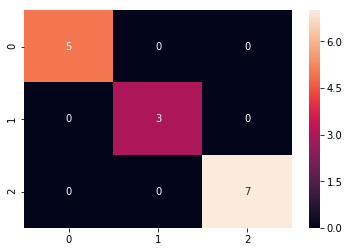

In [27]:
#4 Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X2_train, y2_train)
#Predict Output
rf_predicted = random_forest.predict(X2_test)

random_forest_score = round(random_forest.score(X2_train, y2_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X2_test, y2_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y2_test,rf_predicted))
print(confusion_matrix(y2_test,rf_predicted))

sns.heatmap(confusion_matrix(y2_test,rf_predicted),annot=True,fmt="d")

Support vector training score: 
 95.56
Support vector test score: 
 100.0
Accuracy: 
 1.0
[[5 0 0]
 [0 3 0]
 [0 0 7]]


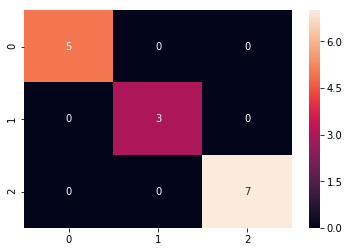

In [28]:
sv_model = svm.SVC() 
sv_model.fit(X2_train,y2_train) 

sv_predicted = sv_model.predict(X2_test)

support_vector_score = round(sv_model.score(X2_train, y2_train) * 100, 2)
support_vector_score_test = round(sv_model.score(X2_test, y2_test) * 100, 2)
print('Support vector training score: \n', support_vector_score)
print('Support vector test score: \n', support_vector_score_test)
print('Accuracy: \n', accuracy_score(y2_test,sv_predicted))
print(confusion_matrix(y2_test,sv_predicted))

sns.heatmap(confusion_matrix(y2_test,sv_predicted),annot=True,fmt="d")

In [29]:
new_features =['SepalLengthCm', 'PetalWidthCm', 'Species']
X3 = iris.drop(new_features, axis=1)
X3.head(3)

,SepalWidthCm,PetalLengthCm
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3


In [30]:
X3 = preprocessing.scale(X3)
y3 = iris['Species']

In [31]:
#Splitting the dataset
X3_train, X3_test, y3_train,  y3_test = train_test_split(X3, y3, test_size = 0.1)

print(X3_train.shape)
print(y3_train.shape)
print(X3_test.shape)
print(y3_test.shape)

(135, 2)
(135,)
(15, 2)
(15,)


Logistic Regression Training Score: 
 85.19
Logistic Regression Test Score: 
 93.33
Accuracy: 
 0.9333333333333333
Confusion Matrix: 
 [[6 0 0]
 [0 5 1]
 [0 0 3]]


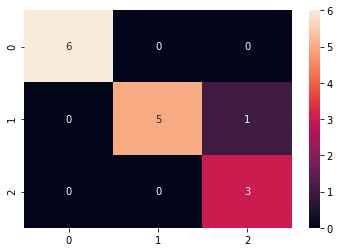

In [32]:
logreg = LogisticRegression()

logreg.fit(X3_train, y3_train)

log_predicted= logreg.predict(X3_test)

logreg_score = round(logreg.score(X3_train, y3_train) * 100, 2)
logreg_score_test = round(logreg.score(X3_test, y3_test) * 100, 2)

print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Accuracy: \n', accuracy_score(y3_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y3_test,log_predicted))

sns.heatmap(confusion_matrix(y3_test,log_predicted),annot=True,fmt="d")

Gaussian Score: 
 92.59
Gaussian Test Score: 
 86.67
Accuracy: 
 0.8666666666666667
[[6 0 0]
 [0 5 1]
 [0 1 2]]


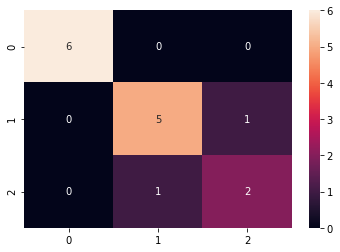

In [33]:
#3 Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X3_train, y3_train)
gauss_predicted = gaussian.predict(X3_test)

gauss_score = round(gaussian.score(X3_train, y3_train) * 100, 2)
gauss_score_test = round(gaussian.score(X3_test, y3_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y3_test, gauss_predicted))
print(confusion_matrix(y3_test,gauss_predicted))

sns.heatmap(confusion_matrix(y3_test,gauss_predicted),annot=True,fmt="d")

Random Forest Score: 
 98.52
Random Forest Test Score: 
 86.67
Accuracy: 
 0.8666666666666667
[[6 0 0]
 [0 5 1]
 [0 1 2]]


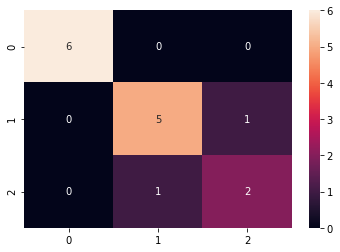

In [34]:
#4 Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X3_train, y3_train)
#Predict Output
rf_predicted = random_forest.predict(X3_test)

random_forest_score = round(random_forest.score(X3_train, y3_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X3_test, y3_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y3_test,rf_predicted))
print(confusion_matrix(y3_test,rf_predicted))

sns.heatmap(confusion_matrix(y3_test,rf_predicted),annot=True,fmt="d")

Support vector training score: 
 95.56
Support vector test score: 
 93.33
Accuracy: 
 0.9333333333333333
[[6 0 0]
 [0 6 0]
 [0 1 2]]


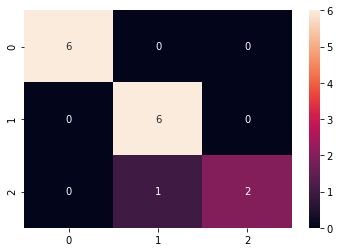

In [35]:
sv_model = svm.SVC() 
sv_model.fit(X3_train,y3_train) 

sv_predicted = sv_model.predict(X3_test)

support_vector_score = round(sv_model.score(X3_train, y3_train) * 100, 2)
support_vector_score_test = round(sv_model.score(X3_test, y3_test) * 100, 2)
print('Support vector training score: \n', support_vector_score)
print('Support vector test score: \n', support_vector_score_test)
print('Accuracy: \n', accuracy_score(y3_test,sv_predicted))
print(confusion_matrix(y3_test,sv_predicted))

sns.heatmap(confusion_matrix(y3_test,sv_predicted),annot=True,fmt="d")

The results above shows that the lowest accuracies occur in this case. Hence, collinearity is not a factor here afterall. 
The scatter plot below confirms some intermingling between versicolor and virginica, which explains the low accuracies.

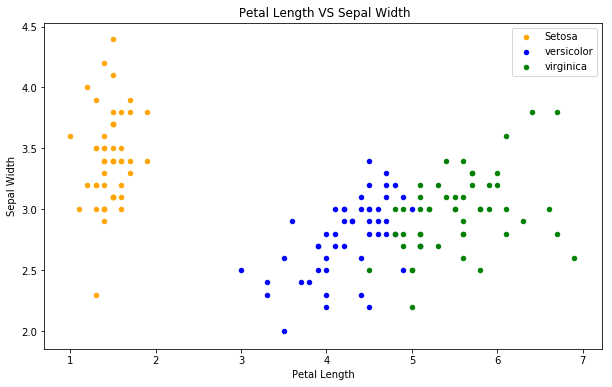

In [36]:
# checking to see if petal length and width can be used for classification
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Sepal Width")
fig.set_title(" Petal Length VS Sepal Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()